In [1]:
!pip freeze | grep scikit-learn

scikit-learn @ file:///croot/scikit-learn_1684954695550/work
scikit-learn-intelex==20230426.111436


In [2]:
import sklearn; sklearn.__version__

'1.2.2'

In [19]:
import os
import pickle
import pandas as pd

os.makedirs('output', exist_ok=True)

In [20]:
year  = 2022
month = 2

input_file  = f'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year:04d}-{month:0>2d}.parquet'
output_file = f'output/yellow_tripdata_{year:04d}-{month:0>2d}.parquet'

In [6]:
with open('model.bin', 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [7]:
categorical     = ["PULocationID", "DOLocationID"]

def read_data(filename: str) -> pd.DataFrame:
    """Read data into DataFrame"""
    df = pd.read_parquet(filename)

    df["tpep_dropoff_datetime"] = pd.to_datetime(df.tpep_dropoff_datetime )
    df["tpep_pickup_datetime"]  = pd.to_datetime(df.tpep_pickup_datetime)

    df["duration"] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]
    df['duration'] = df['duration'].dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    # df[categorical] = df[categorical].astype(str)
    df[categorical] = df[categorical].fillna(-1).astype('int').astype('str')

    return df

In [8]:
#df = read_data('https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2022-02.parquet')
#df = read_data('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet')

df = read_data(input_file)
df['ride_id'] = f'{year:04d}/{month:02d}_' + df.index.astype('str')
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration,ride_id
0,1,2022-02-01 00:06:58,2022-02-01 00:19:24,1.0,5.40,1.0,N,138,252,1,...,1.75,0.5,3.90,0.00,0.3,23.45,0.0,1.25,12.433333,2022/02_0
1,1,2022-02-01 00:38:22,2022-02-01 00:55:55,1.0,6.40,1.0,N,138,41,2,...,1.75,0.5,0.00,6.55,0.3,30.10,0.0,1.25,17.550000,2022/02_1
2,1,2022-02-01 00:03:20,2022-02-01 00:26:59,1.0,12.50,1.0,N,138,200,2,...,1.75,0.5,0.00,6.55,0.3,44.60,0.0,1.25,23.650000,2022/02_2
3,2,2022-02-01 00:08:00,2022-02-01 00:28:05,1.0,9.88,1.0,N,239,200,2,...,0.50,0.5,0.00,3.00,0.3,34.80,2.5,0.00,20.083333,2022/02_3
4,2,2022-02-01 00:06:48,2022-02-01 00:33:07,1.0,12.16,1.0,N,138,125,1,...,0.50,0.5,8.11,0.00,0.3,48.66,2.5,1.25,26.316667,2022/02_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979426,2,2022-02-28 23:50:00,2022-03-01 00:06:00,NaN,3.40,NaN,None,163,193,0,...,0.00,0.5,0.00,0.00,0.3,17.67,NaN,NaN,16.000000,2022/02_2979426
2979427,2,2022-02-28 23:06:57,2022-02-28 23:19:12,NaN,3.48,NaN,None,141,4,0,...,0.00,0.5,2.00,0.00,0.3,19.81,NaN,NaN,12.250000,2022/02_2979427
2979428,2,2022-02-28 23:48:13,2022-03-01 00:03:33,NaN,3.05,NaN,None,161,151,0,...,0.00,0.5,3.81,0.00,0.3,21.49,NaN,NaN,15.333333,2022/02_2979428
2979429,2,2022-02-28 23:56:41,2022-03-01 00:04:57,NaN,2.62,NaN,None,141,226,0,...,0.00,0.5,1.71,0.00,0.3,17.54,NaN,NaN,8.266667,2022/02_2979429


In [9]:
dicts  = df[categorical].to_dict(orient='records')
X_val  = dv.transform(dicts)
y_pred = model.predict(X_val)

In [10]:
y_pred

array([18.52778307, 23.06578208, 33.68635854, ..., 11.89045938,
       15.10268128,  9.46059157])

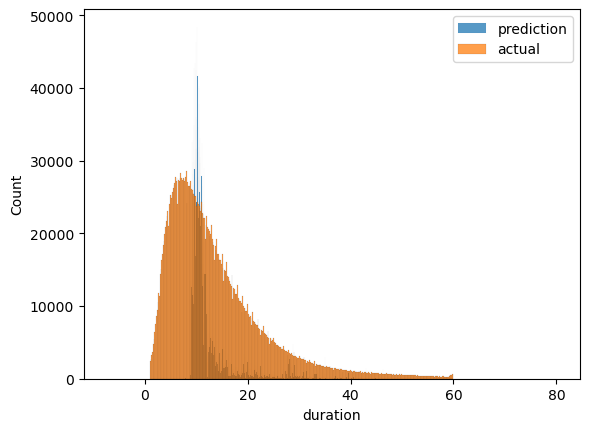

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y_pred, label='prediction')
sns.histplot(df.duration, label='actual')

plt.legend();

### Q1. Notebook

We'll start with the same notebook we ended up with in homework 1.
We cleaned it a little bit and kept only the scoring part. You can find the initial notebook [here](https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/cohorts/2023/04-deployment/homework/starter.ipynb).

Run this notebook for the February 2022 data.

What's the standard deviation of the predicted duration for this dataset?

* 5.28
* 10.28
* 15.28
* 20.28

In [13]:
y_pred.std()

5.28140357655334

In [14]:
y_pred.mean()

12.513422116701408

### Q2. Preparing the output

Like in the course videos, we want to prepare the dataframe with the output. 

First, let's create an artificial `ride_id` column:

```python
df['ride_id'] = f'{year:04d}/{month:02d}_' + df.index.astype('str')
```

Next, write the ride id and the predictions to a dataframe with results. 

Save it as parquet:

```python
df_result.to_parquet(
    output_file,
    engine='pyarrow',
    compression=None,
    index=False
)
```

What's the size of the output file?

* 28M
* 38M
* 48M
* 58M

__Note:__ Make sure you use the snippet above for saving the file. It should contain only these two columns. For this question, don't change the
dtypes of the columns and use pyarrow, not fastparquet. 

In [15]:
df_result = pd.DataFrame()
df_result['ride_id'] = df['ride_id']
df_result['predicted_duration'] = y_pred

In [21]:
df_result.to_parquet(
    output_file,
    engine='pyarrow',
    compression=None,
    index=False
)

In [27]:
%ls output

yellow_tripdata_2022-02.parquet*


In [26]:
# So what's the size of the saved parquet file?
!stat ./output/yellow_tripdata_2022-02.parquet  | grep Size:       | awk '{print $2}'
!du -h ./output/yellow_tripdata_2022-02.parquet | awk '{print $1}'

59994935
58M
